In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Unnamed: 0,Sexo,GRUPO,DEVERII,IC_MESES,Atraso_PS,IT_PS_mes,Atraso_MF,IT_MF_mes,Atraso_LG,...,sociodemografico,esc_pai,esc_mae,n_irmaos,andou,escola_meses,Periodo,idade_pai,idade_mae,aborto
0,1,F,GSRI,Normal,58,0,60,0,63,0,...,2,4,3,2,15,24,meio,27,20,0
1,4,M,GSRI,Normal,38,0,36,0,42,0,...,3,5,5,1,12,36,meio,38,31,0
2,8,F,GSRI,Risco,31,1,24,0,42,0,...,2,4,4,0,12,36,meio,26,34,0
3,11,F,GSRI,Risco,41,3,24,1,30,1,...,2,3,3,0,12,0,nao,29,19,0
4,12,F,GSRI,Risco,39,1,36,0,33,0,...,2,2,3,3,11,12,integral,44,19,0


In [5]:
df.loc[df['DEVERII'] == 'Normal'].describe()

,Unnamed: 0,IC_MESES,Atraso_PS,IT_PS_mes,Atraso_MF,IT_MF_mes,Atraso_LG,IT_LG,Atraso_MG,IT_MG,...,passou_MG,sociodemografico,esc_pai,esc_mae,n_irmaos,andou,escola_meses,idade_pai,idade_mae,aborto
count,15.000000,15.000000,15.0,15.000000,15.0,15.000000,15.0,15.000000,15.0,15.000000,...,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,11.133333,35.133333,0.0,38.000000,0.0,37.600000,0.0,43.600000,0.0,42.800000,...,25.466667,2.333333,3.866667,4.00000,1.466667,11.666667,15.666667,32.866667,28.533333,0.800000
std,4.763952,8.416537,0.0,8.976159,0.0,9.745329,0.0,8.475174,0.0,11.136812,...,2.850230,0.617213,1.125463,0.92582,1.407463,1.588650,12.754084,8.567936,5.914470,2.305273
min,1.000000,26.000000,0.0,24.000000,0.0,30.000000,0.0,33.000000,0.0,27.000000,...,22.000000,1.000000,1.000000,2.00000,0.000000,10.000000,0.000000,21.000000,20.000000,0.000000
25%,9.500000,28.000000,0.0,36.000000,0.0,30.000000,0.0,36.000000,0.0,36.000000,...,23.000000,2.000000,3.000000,3.50000,0.500000,10.500000,2.500000,27.000000,24.000000,0.000000
50%,12.000000,33.000000,0.0,36.000000,0.0,33.000000,0.0,42.000000,0.0,39.000000,...,25.000000,2.000000,4.000000,4.00000,1.000000,12.000000,18.000000,29.000000,28.000000,0.000000
75%,14.500000,39.000000,0.0,39.000000,0.0,42.000000,0.0,51.000000,0.0,46.500000,...,26.000000,3.000000,5.000000,5.00000,2.500000,12.000000,25.500000,38.500000,32.000000,0.500000
max,16.000000,58.000000,0.0,60.000000,0.0,63.000000,0.0,57.000000,0.0,72.000000,...,32.000000,3.000000,5.000000,5.00000,4.000000,15.000000,36.000000,51.000000,38.000000,9.000000


In [6]:
df.loc[df['DEVERII'] == 'Risco'].describe()

,Unnamed: 0,IC_MESES,Atraso_PS,IT_PS_mes,Atraso_MF,IT_MF_mes,Atraso_LG,IT_LG,Atraso_MG,IT_MG,...,passou_MG,sociodemografico,esc_pai,esc_mae,n_irmaos,andou,escola_meses,idade_pai,idade_mae,aborto
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,8.444444,39.333333,0.888889,32.333333,0.111111,40.000000,0.222222,40.666667,0.111111,42.333333,...,25.666667,2.0,3.333333,4.000000,1.222222,12.222222,21.333333,31.555556,26.111111,0.222222
std,5.592654,11.202678,1.054093,11.500000,0.333333,13.747727,0.440959,14.317821,0.333333,8.674676,...,2.783882,0.0,1.224745,0.707107,1.301708,1.092906,17.406895,6.948221,6.071335,0.440959
min,1.000000,28.000000,0.000000,24.000000,0.000000,30.000000,0.000000,24.000000,0.000000,24.000000,...,21.000000,2.0,1.000000,3.000000,0.000000,11.000000,0.000000,24.000000,19.000000,0.000000
25%,4.000000,31.000000,0.000000,24.000000,0.000000,33.000000,0.000000,36.000000,0.000000,36.000000,...,23.000000,2.0,3.000000,4.000000,0.000000,12.000000,8.000000,26.000000,21.000000,0.000000
50%,8.000000,38.000000,1.000000,27.000000,0.000000,33.000000,0.000000,36.000000,0.000000,45.000000,...,26.000000,2.0,4.000000,4.000000,1.000000,12.000000,20.000000,29.000000,27.000000,0.000000
75%,12.000000,41.000000,1.000000,36.000000,0.000000,42.000000,0.000000,42.000000,0.000000,48.000000,...,27.000000,2.0,4.000000,4.000000,2.000000,12.000000,30.000000,37.000000,30.000000,0.000000
max,16.000000,58.000000,3.000000,60.000000,1.000000,72.000000,1.000000,72.000000,1.000000,51.000000,...,29.000000,2.0,5.000000,5.000000,3.000000,14.000000,54.000000,44.000000,35.000000,1.000000


In [7]:
corr = df.corr()

In [8]:

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

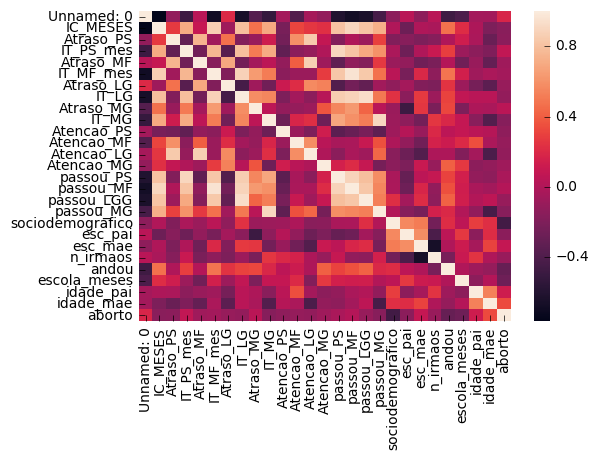

In [9]:
plt.show()

In [10]:
df.head()

,Unnamed: 0,Sexo,GRUPO,DEVERII,IC_MESES,Atraso_PS,IT_PS_mes,Atraso_MF,IT_MF_mes,Atraso_LG,...,sociodemografico,esc_pai,esc_mae,n_irmaos,andou,escola_meses,Periodo,idade_pai,idade_mae,aborto
0,1,F,GSRI,Normal,58,0,60,0,63,0,...,2,4,3,2,15,24,meio,27,20,0
1,4,M,GSRI,Normal,38,0,36,0,42,0,...,3,5,5,1,12,36,meio,38,31,0
2,8,F,GSRI,Risco,31,1,24,0,42,0,...,2,4,4,0,12,36,meio,26,34,0
3,11,F,GSRI,Risco,41,3,24,1,30,1,...,2,3,3,0,12,0,nao,29,19,0
4,12,F,GSRI,Risco,39,1,36,0,33,0,...,2,2,3,3,11,12,integral,44,19,0


In [11]:
df2 = df.copy()

In [12]:
df2.columns = [range(0,len(df2.columns))]

In [13]:
sns.set_style("whitegrid")
sns.boxplot(data=df2, palette="deep")
sns.despine(left=True)

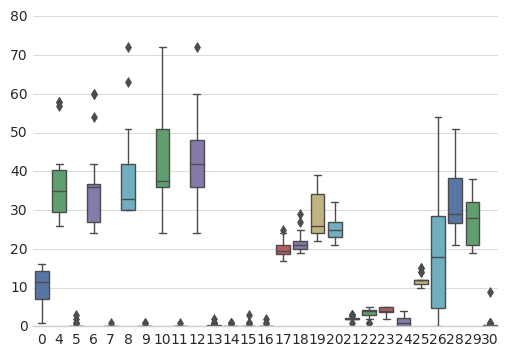

In [14]:
plt.show()

/home/luis/anaconda2/lib/python2.7/site-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


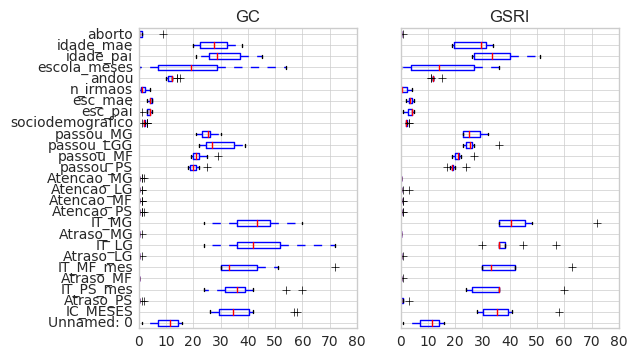

In [15]:
df.groupby('GRUPO').boxplot(vert=False)
plt.show()

In [321]:
df['DEVERII'].replace('Normal',1, inplace=True)
df['DEVERII'].replace('Risco',0, inplace=True)

In [352]:
df['Sexo'].replace('M',1, inplace=True)
df['Sexo'].replace('F',0, inplace=True)

In [353]:
df3 = df[df.columns -['Grupo', 'Periodo', 'GRUPO', 'Unnamed: 0']].copy()

/home/luis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [354]:
from sklearn import preprocessing

In [355]:
from sklearn.decomposition import PCA,KernelPCA

In [356]:
quantile_transformer = preprocessing.MinMaxScaler()
df_st = quantile_transformer.fit_transform(df3)

In [357]:
pca = PCA(n_components=3)

In [358]:
#df_st_pca = pca.fit(df3).transform(df3)

In [359]:
df_st_pca = pca.fit(df_st).transform(df_st)

In [360]:
temp = pd.DataFrame(df_st, columns=df3.columns).copy()
temp['target'] = df['GRUPO']

In [361]:
temp.to_csv("data_st_tg.csv")

In [362]:
np.sum(pca.explained_variance_)

1.3052688057589905

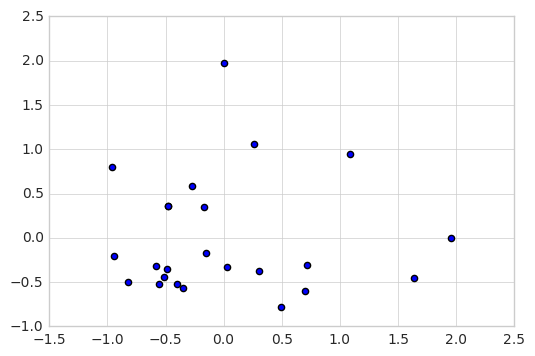

In [363]:
plt.scatter(df_st_pca[:,0],df_st_pca[:,1], )
plt.show()

In [364]:
df4 = pd.DataFrame(df_st_pca, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [365]:
df4['target'] = df['GRUPO']

In [366]:
df4.to_csv("data_pca.csv")

In [369]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)

targets = ['GC', 'GSRI']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df4['target'] == target
    ax.scatter(df4.loc[indicesToKeep, 'principal component 1']
               , df4.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

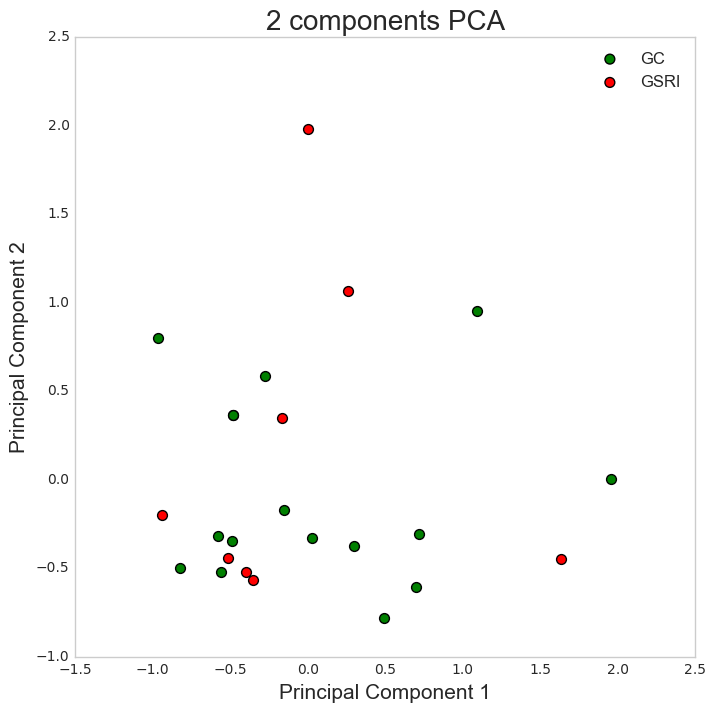

In [370]:
plt.show()

In [371]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=18, azim=134)

In [372]:

#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['GC', 'GSRI']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df4['target'] == target
    ax.scatter(df4.loc[indicesToKeep, 'principal component 1']
               , df4.loc[indicesToKeep, 'principal component 2']
               , df4.loc[indicesToKeep, 'principal component 3']
               , c = color, s=50
               )

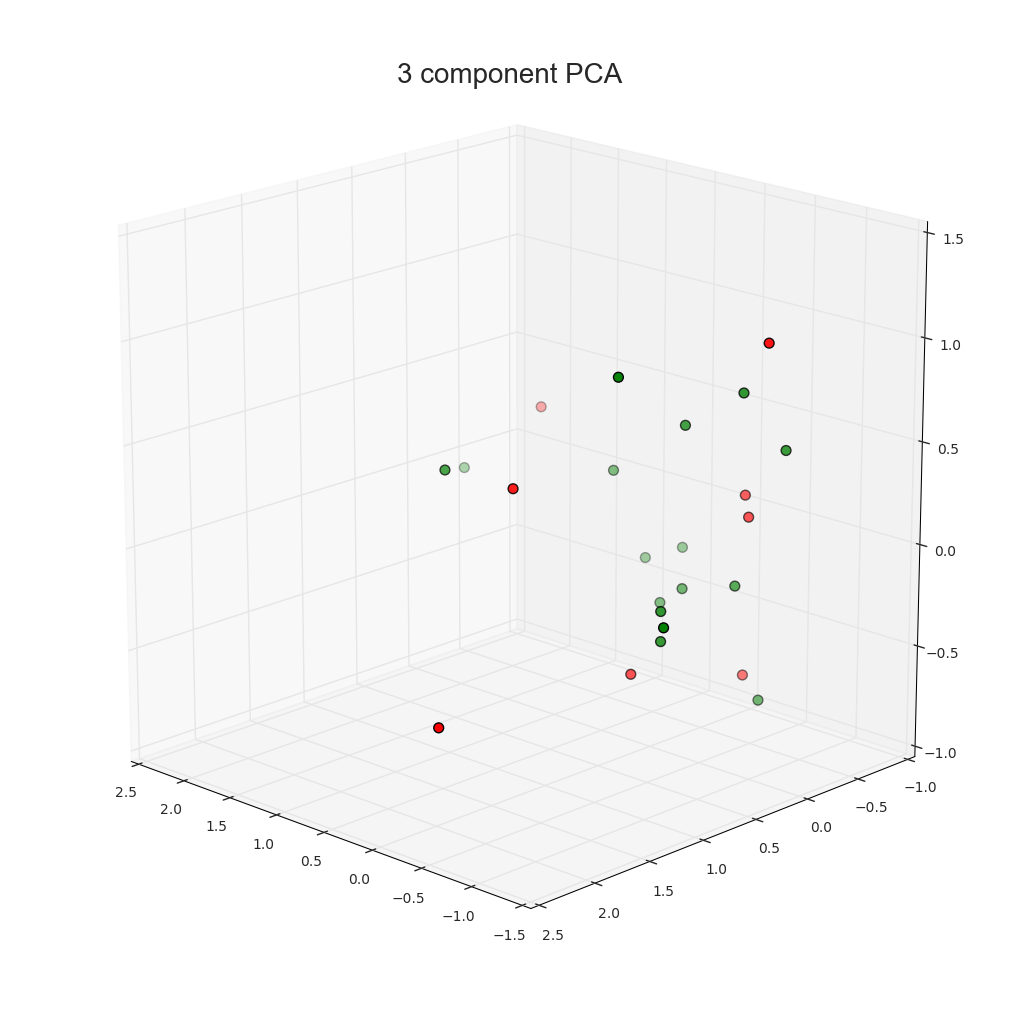

In [373]:
plt.show()

In [374]:

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, degree=2, n_components=3)
X_kpca = kpca.fit_transform(df_st)

In [375]:
df_k = pd.DataFrame(X_kpca, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [376]:
df_k['target'] = df['GRUPO']

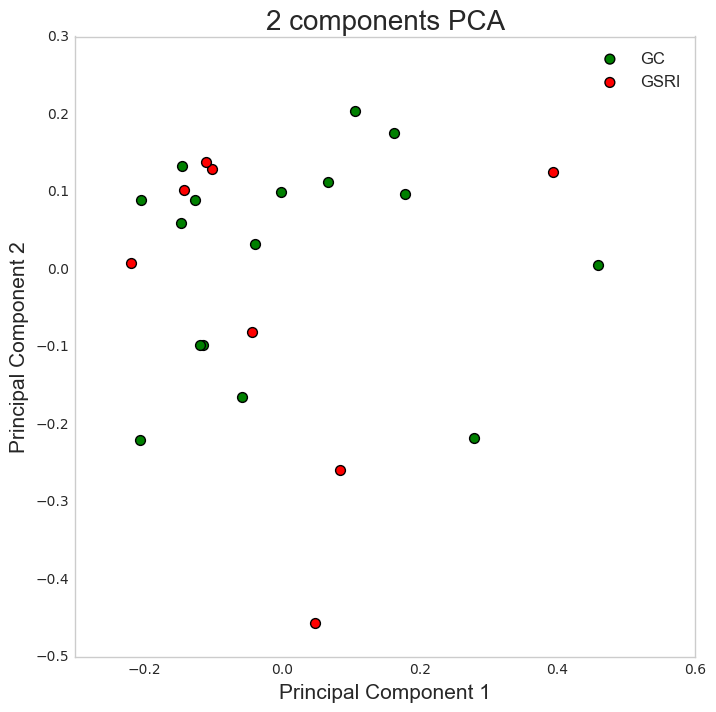

In [377]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)

targets = ['GC', 'GSRI']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df_k['target'] == target
    ax.scatter(df_k.loc[indicesToKeep, 'principal component 1']
               , df_k.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [378]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=18, azim=134)

In [379]:
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['GC', 'GSRI']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df_k['target'] == target
    ax.scatter(df_k.loc[indicesToKeep, 'principal component 1']
               , df_k.loc[indicesToKeep, 'principal component 2']
               , df_k.loc[indicesToKeep, 'principal component 3']
               , c = color, s=50
               )

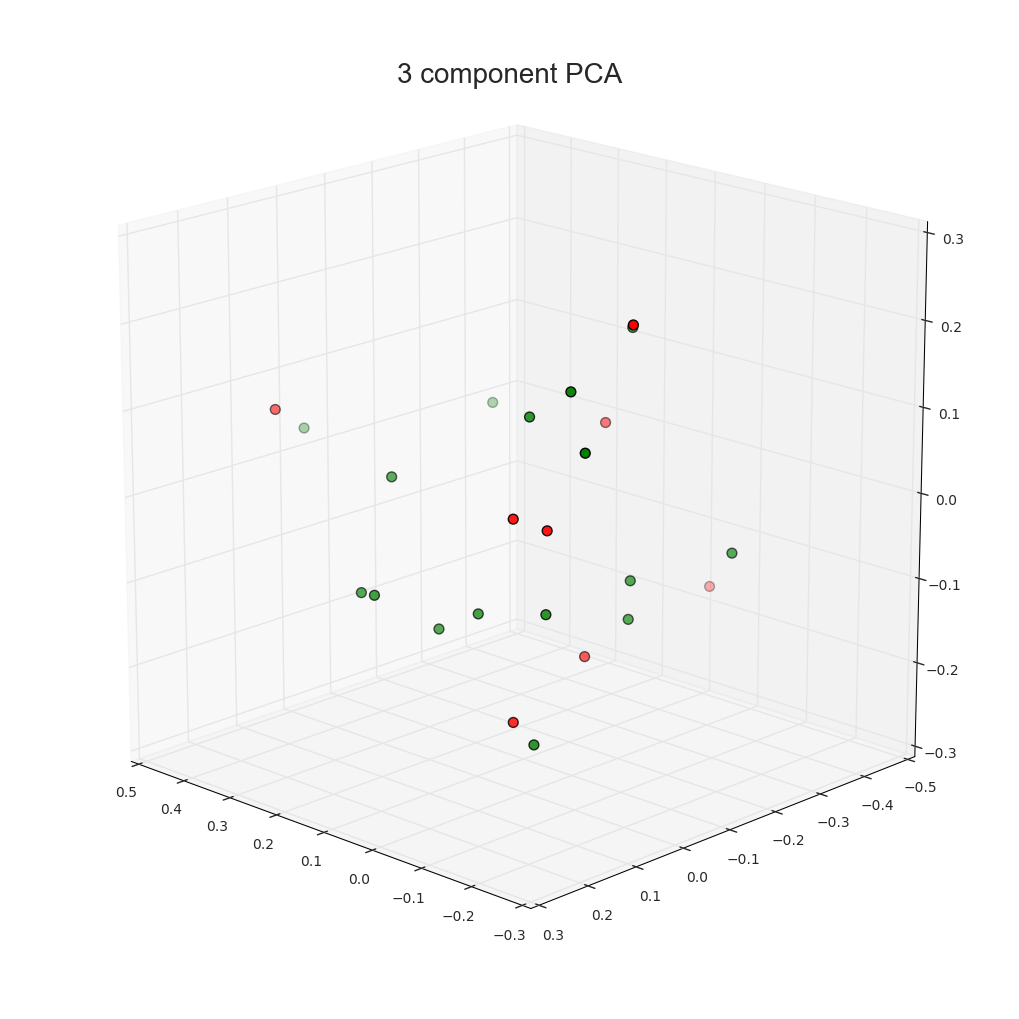

In [380]:
plt.show()